In [26]:
import torch
import unittest
from pprint import pprint
from dataclasses import asdict
from matplotlib import pyplot as plt

from mutual_information.data.dataloader_utils import load_dataloader
from mutual_information.models.models_utils import load_binary_classifier
from mutual_information.trainers.trainers_utils import load_experiments_configuration

from mutual_information.models.mutual_information import MutualInformationEstimator
from mutual_information.trainers.mi_trainer import MutualInformationTrainer

from mutual_information.configs.mi_config import get_config_from_file
from mutual_information.trainers.mi_trainer_config import MITrainerConfig
from mutual_information.configs.mi_config import MutualInformationConfig
from mutual_information.models.binary_classifier_config import BaseBinaryClassifierConfig
from mutual_information.data.dataloaders import ContrastiveMultivariateGaussianLoaderConfig

In [43]:
dimensions_per_variable = 1
number_of_variables = 2
batch_size = 32
experiment_indentifier = "mi_1d_mine"
data_set = "basic"

config = MutualInformationConfig(experiment_name='mi',
                                 experiment_type='multivariate_gaussian',
                                 experiment_indentifier=experiment_indentifier,
                                 delete=True)
config.dataloader = ContrastiveMultivariateGaussianLoaderConfig(dimensions_per_variable=dimensions_per_variable,
                                                                number_of_variables=number_of_variables,
                                                                sample_size=1000,
                                                                batch_size=batch_size,
                                                                data_set=data_set,
                                                                delete_data=False)
config.binary_classifier = BaseBinaryClassifierConfig(hidden_size=100)
config.trainer = MITrainerConfig(number_of_epochs=500,
                                 save_model_epochs=100)

In [44]:
# CHECK DATA

In [45]:
dataloader = load_dataloader(config)
databatch = next(dataloader.train().__iter__())

In [46]:
X_JOIN = []
X_INDEPENDENT = []
for databatch in dataloader.train():
    x_join = databatch["join"]
    x_independent = databatch["independent"]
    X_JOIN.append(x_join)
    X_INDEPENDENT.append(x_independent)
X_JOIN = torch.vstack(X_JOIN)
X_INDEPENDENT = torch.vstack(X_INDEPENDENT)

In [47]:
X_INDEPENDENT.shape

torch.Size([800, 2])

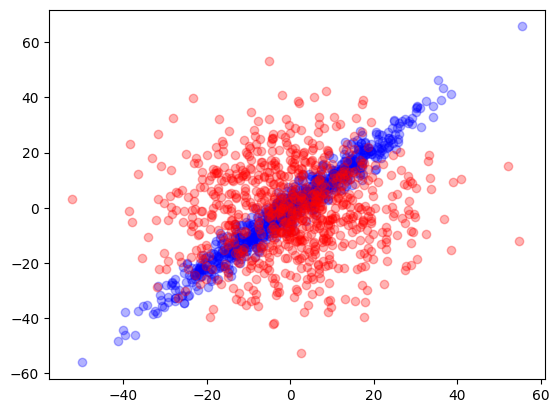

In [48]:
if experiment_indentifier == "mi_1d":
    plt.plot(X_JOIN[:,0],X_JOIN[:,1],"bo",alpha=0.3)
    plt.plot(X_INDEPENDENT[:,0],X_INDEPENDENT[:,1],"ro",alpha=0.3)
else:
    fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(12,3))
    ax[0].plot(X_JOIN[:,0],X_JOIN[:,2],"bo",alpha=0.3)
    ax[0].plot(X_INDEPENDENT[:,0],X_INDEPENDENT[:,2],"ro",alpha=0.3)
    ax[1].plot(X_JOIN[:,1],X_JOIN[:,3],"bo",alpha=0.3)
    ax[1].plot(X_INDEPENDENT[:,1],X_INDEPENDENT[:,3],"ro",alpha=0.3)

In [49]:
MIT = MutualInformationTrainer(config)
MIT.train()

Epoch: 1, Loss: 1.8391591119766235
Epoch: 11, Loss: 1.005057044029236
Epoch: 21, Loss: 0.9880987048149109
Epoch: 31, Loss: 0.982897219657898
Epoch: 41, Loss: 0.9802933144569397
Epoch: 51, Loss: 0.9781058311462403
Epoch: 61, Loss: 0.9760888075828552
Epoch: 71, Loss: 0.9741424512863159
Epoch: 81, Loss: 0.972320282459259
Epoch: 91, Loss: 0.9706415677070618
Epoch: 101, Loss: 0.9688120937347412
Epoch: 111, Loss: 0.9670399308204651
Epoch: 121, Loss: 0.9654957127571105
Epoch: 131, Loss: 0.9640575075149536
Epoch: 141, Loss: 0.9626520156860352
Epoch: 151, Loss: 0.9612872695922852
Epoch: 161, Loss: 0.960030505657196
Epoch: 171, Loss: 0.9588272142410278
Epoch: 181, Loss: 0.9576872730255127
Epoch: 191, Loss: 0.9565959405899048
Epoch: 201, Loss: 0.9555985403060913
Epoch: 211, Loss: 0.954606339931488
Epoch: 221, Loss: 0.9536706805229187
Epoch: 231, Loss: 0.9527916121482849
Epoch: 241, Loss: 0.9519596004486084
Epoch: 251, Loss: 0.9511790323257446
Epoch: 261, Loss: 0.9504361414909362
Epoch: 271, Loss:

In [50]:
MIE = MutualInformationEstimator()
MIE.load_results_from_directory(experiment_name='mi',
                                experiment_type='multivariate_gaussian',
                                experiment_indentifier=experiment_indentifier,
                                checkpoint=None)

In [51]:
databath = next(MIE.dataloader.train().__iter__())
x_join = databath["join"]
x_independent = databath["independent"]
p_join = MIE.binary_classifier(x_join)
p_independent = MIE.binary_classifier(x_independent)

print("p join: {0} p independent: {1}".format(p_join.mean(),p_independent.mean()))

p join: 0.7354241609573364 p independent: 0.33398208022117615


In [52]:
MIE.MI_Estimate()

(tensor(-10.0581, grad_fn=<SumBackward0>),
 tensor(-0.0126, grad_fn=<DivBackward0>))

In [53]:
MIE.dataloader.mutual_information()

tensor(1.7256)

In [20]:
torch.det(MIE.dataloader.covariance_full)

tensor(500747.1250)